In [1]:
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from preprocessing_sequencing import preprocess_sequences as ps
%matplotlib inline


In [2]:

mice = ['FIAA45.6a', 'FIAA45.6d', 'FIAA55.4d']
negs_dict = {}

for mouse in mice:
    parameters_path = pathlib.Path(f"/camp/lab/znamenskiyp/home/shared/projects/turnerb_A1_MAPseq/{mouse}/Sequencing")
    parameters = ps.load_parameters(directory=str(parameters_path))
    barcodes_across_sample = pd.read_pickle(
        str(parameters_path / "final_processed_sequences/barcodes_across_sample.pkl")
    )
    max_y = 100
    rcParams["figure.figsize"] = (8, 5)
    interpolate_on_x = len(np.flip(np.sort(barcodes_across_sample.sum(axis=1)))) - len(
        np.flip(np.sort(barcodes_across_sample.sum(axis=1)))[
            np.flip(np.sort(barcodes_across_sample.sum(axis=1))) < max_y
        ]
    )
    filtered_barcodes = barcodes_across_sample[barcodes_across_sample.sum(axis=1) >= max_y]
    negative_samples = parameters['negative_control_samples']
    negs_dict[mouse] = filtered_barcodes[negative_samples].melt(
        var_name="samples", value_name="barcode_counts")

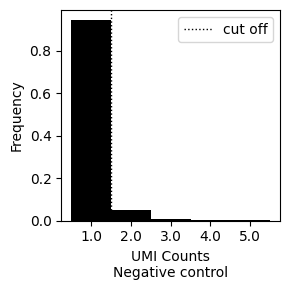

In [27]:
dist_list = []

for mouse, df in negs_dict.items():
    # Filter for barcode_counts > 0 and get value counts
    dist = df.loc[df["barcode_counts"] > 0, "barcode_counts"].value_counts()
    dist_list.append(dist)

# Combine the distributions (summing frequencies for matching barcode_counts)
total_distribution = pd.concat(dist_list, axis=1).fillna(0).sum(axis=1)
total_distribution = total_distribution.sort_index()

# Normalize the distribution to frequencies (relative frequency)
total_distribution_norm = total_distribution / total_distribution.sum()

# Plot the normalized histogram as a bar plot with no spacing between bars
plt.figure(figsize=(3, 3))
ax = total_distribution_norm.plot(kind="bar", width=1, color='black')  # width=1 to remove spacing between bars
ax.axvline(x=0.5, color='black', linestyle='dotted', linewidth=1, label='cut off')
plt.xlabel(f"UMI Counts\nNegative control")
plt.ylabel("Frequency")
plt.legend(loc='upper right')
plt.xticks(rotation=0)  # Rotate x labels to 0 degrees
plt.tight_layout()
plt.show()

In [22]:
total_distribution_norm

1.0    0.945416
2.0    0.048225
3.0    0.005299
4.0    0.000530
5.0    0.000530
dtype: float64